**Problem Statement : **As part Open AI Training Hackathon. We want to leverage Generative Open AI Model & extend it for Summarization of Data Science Fundamentals for users by building RAG with EY specific learning & training documents

**High Level Architecture of our Project **
1. Prompt & Query - By leveraging Azure Open AI Studio or via OpenAI APIs using Custom python program
2. Releveant Information for Enhanced Context - Leveraging EY specific L&D training documents
4. Prompt + Query + Enhanced Context - Open AI Search Service with indexed EY datasets
5. Generated Text Response - By leveraging Azure Open AI Studio or via OpenAI APIs using Custom python program

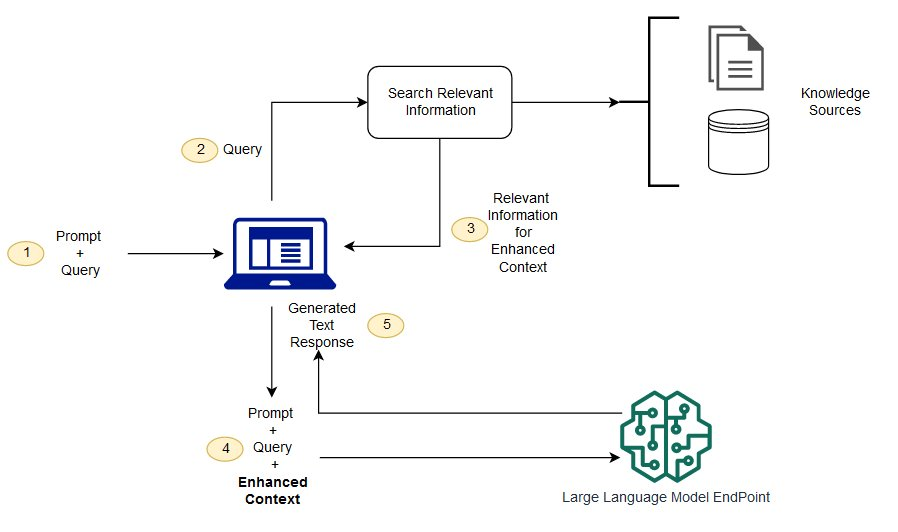

In [13]:
!pip install openai==1.13.3
# Add Azure OpenAI package
from openai import AzureOpenAI

import json

# Flag to show citations
show_citations = True

# Get configuration settings
azure_oai_endpoint ="https://eyuser22.openai.azure.com/"
azure_oai_key =""
azure_oai_deployment ="turbo-16k"
azure_search_endpoint = "https://aiserviceuser22.search.windows.net"
azure_search_key = ""
azure_search_index = "dsfundamentals"

In [14]:
# Initialize the Azure OpenAI client
client = AzureOpenAI(
            base_url=f"{azure_oai_endpoint}/openai/deployments/{azure_oai_deployment}/extensions",
            api_key=azure_oai_key,
            api_version="2023-09-01-preview")

In [15]:
# Configure your data source
extension_config = dict(dataSources = [
        {
            "type": "AzureCognitiveSearch",
            "parameters": {
                "endpoint":azure_search_endpoint,
                "key": azure_search_key,
                "indexName": azure_search_index,
            }
        }]
    )

In [16]:
# Get the prompt
text = input('\nEnter a question:\n')


Enter a question:
Tell me about K-Means clustering on the line


In [22]:
# Send request to Azure OpenAI model
print("...Sending the following request to Azure OpenAI endpoint...")
print("Request: " + text + "\n")

response = client.chat.completions.create(
    model = azure_oai_deployment,
    temperature = 0,
    max_tokens = 1000,
    messages = [
         {"role": "system", "content": "You are Data science expert trainer "},
         {"role": "user", "content": text}
            ],
            extra_body = extension_config
        )

...Sending the following request to Azure OpenAI endpoint...
Request: Tell me about K-Means clustering on the line



In [18]:
# Print response
print("Response: " + response.choices[0].message.content + "\n")

Response: K-Means clustering on the line is a specific case where the data points are arranged in a one-dimensional space, such as a line [doc2]. In this scenario, the optimal K-Means clustering can be found in polynomial time using dynamic programming [doc2]. The algorithm works as follows:

1. Sort the data points in ascending order.
2. For each data point, compute the cost of using a single center for that point and all the points to its right. The cost is the sum of distances between each point and its mean value.
3. Iterate through all possible values of K (the number of clusters) and compute the optimal K-Means clustering for each value. This can be done by considering the cost of the previous K-1 clustering and adding the cost of the new center.
4. Store the minimum cost for each value of K, along with the corresponding clustering.

The running time of this algorithm is O(KN), where N is the number of data points [doc2]. Therefore, the overall running time is O(KN^2) [doc2].

It

In [19]:
#Check for the citations
if (show_citations):
    # Print citations
    print("Citations:")
    citations = response.choices[0].message.context["messages"][0]["content"]
    citation_json = json.loads(citations)
    for c in citation_json["citations"]:
        print("  Title: " + c['title'] + "\n    URL: " + c['url'])

Citations:
  Title: Foundations of Data Science∗
    URL: https://myfilestorage21.blob.core.windows.net/fileupload-dsfundamentals/Foundation%20of%20Data%20Science.pdf
  Title: Foundations of Data Science∗
    URL: https://myfilestorage21.blob.core.windows.net/fileupload-dsfundamentals/Foundation%20of%20Data%20Science.pdf
  Title: Foundations of Data Science∗
    URL: https://myfilestorage21.blob.core.windows.net/fileupload-dsfundamentals/Foundation%20of%20Data%20Science.pdf
  Title: Foundations of Data Science∗
    URL: https://myfilestorage21.blob.core.windows.net/fileupload-dsfundamentals/Foundation%20of%20Data%20Science.pdf
  Title: Foundations of Data Science∗
    URL: https://myfilestorage21.blob.core.windows.net/fileupload-dsfundamentals/Foundation%20of%20Data%20Science.pdf
